In [17]:
import vanna
from vanna.remote import VannaDefault
import psycopg2
from dotenv import load_dotenv
import os

# Setup

In [18]:
load_dotenv('.env', override=True)
VANNA_KEY = os.getenv('VANNA_KEY')
VANNA_MODEL_NAME = os.getenv('VANNA_MODEL_NAME')
DB_SERVER = os.getenv('DB_SERVER')
DB_NAME = os.getenv('DB_NAME')
DB_USER = os.getenv('DB_USER')
DB_PASSWORD = os.getenv('DB_PASSWORD')
DB_PORT = os.getenv('DB_PORT')

# Set Model

In [19]:
vanna_model_name = VANNA_MODEL_NAME
vn = VannaDefault(model=vanna_model_name, api_key=VANNA_KEY)

# Connect to the Database

In [20]:
vn.connect_to_postgres(DB_SERVER,DB_NAME,DB_USER,DB_PASSWORD,DB_PORT)

# Questions


--------------------------------

[QUESTION]: Give me the total amount of products by category 

[QUERY]:
SELECT pc.name AS category, COUNT(*) AS total_products
FROM production.product p
JOIN production.productsubcategory psc ON p.productsubcategoryid = psc.productsubcategoryid
JOIN production.productcategory pc ON psc.productcategoryid = pc.productcategoryid
GROUP BY pc.name;


,category,total_products
0,Bikes,97
1,Accessories,29
2,Clothing,35
3,Components,134


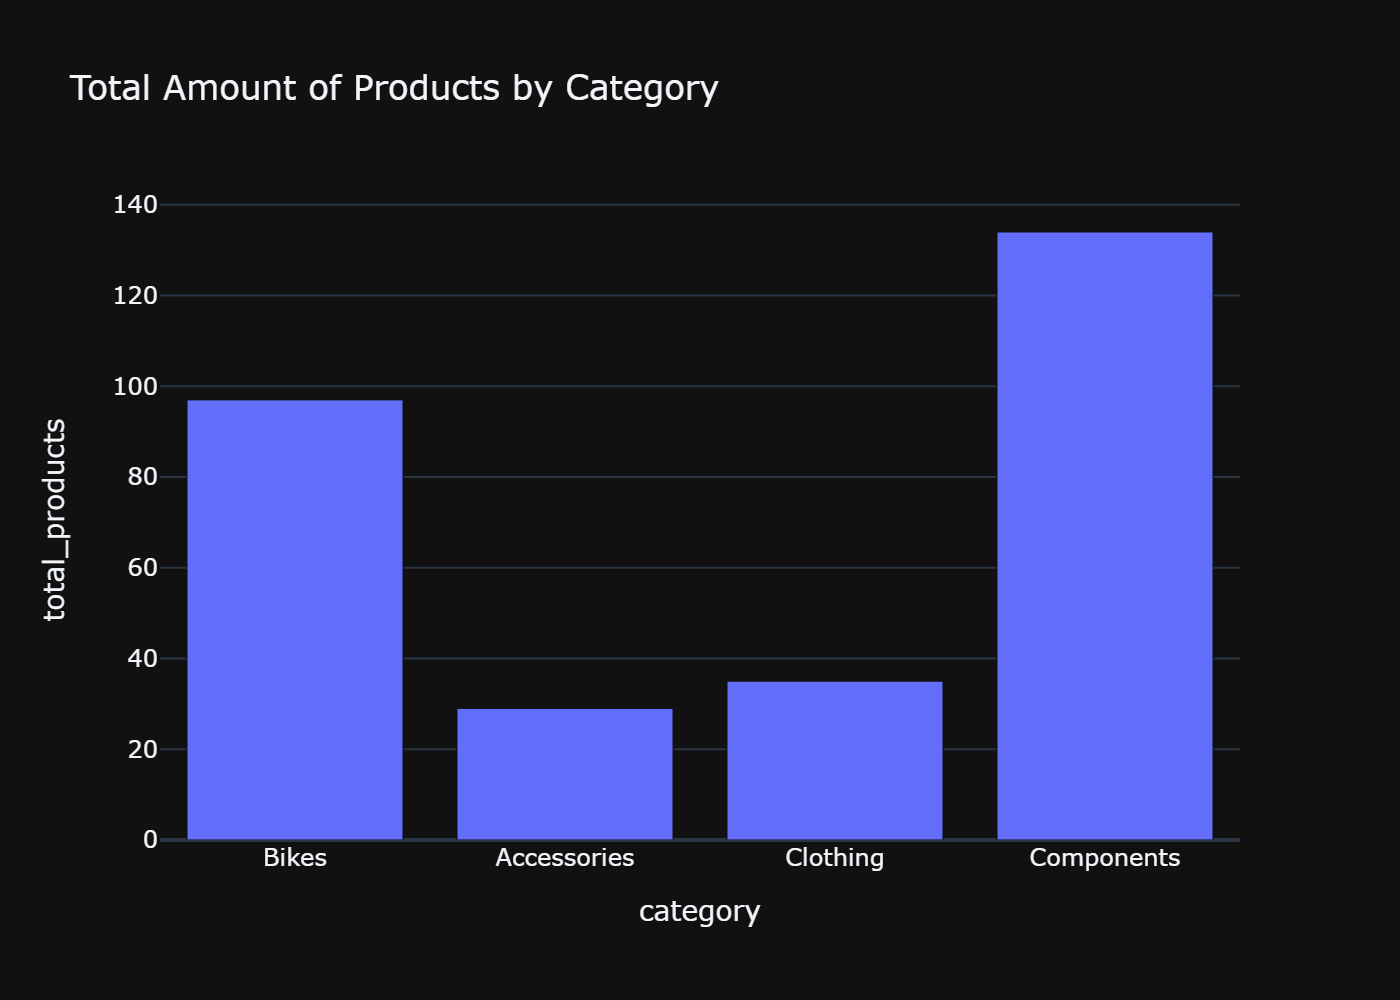

In [53]:
questions = [
    # "What it the total amount of people by region?", # SUCCESS
    # "Group the amount of people each business entity have", # SUCCESS
    # "How much work orders are?", # SUCCESS
    # "Which is the product most ordered?" # SUCCESS, but first missed error on postgres sintaxis, 
    "Give me the total amount of products by category", # SUCCESS,but first missed schema on join
    # "What is the total amount from sales?", # FAILS, missed schama and wrong tables
    # "What is the total profit?", # FAILS, missed schema and wrong tables
    # "Which is the product that most changed his cost over the past?", # WRONG, the result is not accurate but the table used is correct
    # "How much product were sold for each category?" # FAILS, the schema is correct but the table used does not exists,
    # "What is the total cost amount of all the products?", # FAILS, missed schema and wrong tables
    # "What is the average sales per customers?", # FAILS, missed schema and wrong tables
    # "What is the number of products in each category?", # FAILS, missed schema and wrong tables
    # "Top 10 Customers with the highest purchase", # FAILS, missed schema and wrong tables
    # "Top 10 Employees with the highest sale", # FAILS, missed schema and wrong tables
    # "Top 10 most sale products", # FAILS, missed schema and wrong tables
    # "Top 10 Employees with the highest sale", # FAILS, missed schema and wrong tables
    # "and what are their middlenames?",
    # "and where they live?",
    # "and what are their emails?",
    # "Rank customers by sales",
    ]
for i in range(len(questions)):
    try:
        print('\n--------------------------------\n')
        print(f'[QUESTION]: {questions[i]} \n')
        # query = vn.generate_sql(questions[i])
        print(f'[QUERY]:')
        sql_result = vn.ask(questions[i])
    except Exception as e:
        print(e.args)

